In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy.io.img_tiles as cimgt
import io
from urllib.request import urlopen, Request
from PIL import Image
from numpy.polynomial.polynomial import Polynomial
from h5py import File
import cartopy.feature as cfeature
import pandas as pd
import netCDF4 as nc
import scipy
import glob
import cartopy as cart
#from herbie import Herbie


In [ ]:
f['CH4DataProducts'].keys()

In [ ]:
f['Nav_Data'].keys()

In [10]:
flts = ['20230726_R0_F1','20230726_R0_F2','20230728_R0_F1','20230728_R0_F2','20230805_R0_F1','20230809_R0_F1']
halo = {}
for fl in flts:
    fname = f'staqs-HALO-XCH4_LARC-G3_{fl}.h5'
    f = File(fname,'r')
    halo[fl] = {}
    halo[fl]['lat'] = f['Nav_Data']['gps_lat'][:]
    halo[fl]['lon'] = f['Nav_Data']['gps_lon'][:]
    halo[fl]['alt'] = f['Nav_Data']['gps_alt'][:]
    halo[fl]['time'] = f['Nav_Data']['gps_time'][:]
    halo[fl]['xch4'] = f['CH4DataProducts']['XCH4_clear'][:]
    

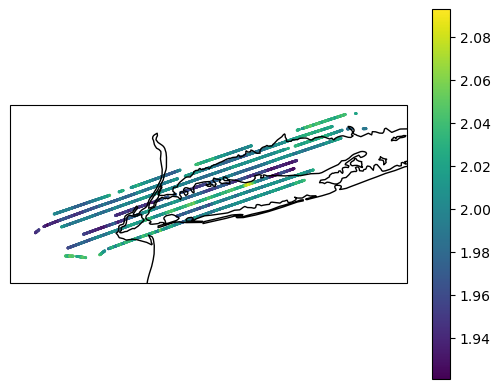

In [16]:
t_lims = [[13.55,16.11],[18.2,20.75],[13.55,16.07],[18.2,20.75],[13.7,16.85],[16.98,20.15]]
for fl in flts[:1]:
    t = halo[fl]['time'][:]
    inds = np.where((t > t_lims[0][0])*(t < t_lims[0][1]))[0]
    fig,ax = plt.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree()})
    
    g = ax.scatter(halo[fl]['lon'][inds],halo[fl]['lat'][inds],c=halo[fl]['xch4'][inds],s=1,transform=ccrs.PlateCarree())
    plt.colorbar(g,ax=ax)
    ax.coastlines()